*By Nagham Rizk*  
*23ppmk@queensu.ca*  
*Student ID: 20481034*  
*CISC 873 Data Mining - Winter 2024*  
*DR Steven Ding*  
*CISC 873*

<center>

# CISC873-DM-W24-A6
# Anti-Cancer Drug Activity Prediction

</center>

![Data Science Image](cm.jpg)

### Problem Formulation

**Problem:**
The problem is to predict the anticancer activity of chemical compounds, specifically targeting non-small cell lung cancer. Each chemical compound is represented as a graph in SDF (Structure Data Format), where atoms represent nodes and bonds represent edges.

**Input:**
- Graph representations of chemical compounds in SDF format, with nodes representing atoms and edges representing bonds.

**Output:**
- Prediction of the anticancer activity, indicating whether a compound is positive (effective against non-small cell lung cancer) or negative (not effective).

**Data Mining Function:**
Classification is the primary data mining function required to predict the activity of chemical compounds.

### **Challenges:**
| Challenges           | Description                                                                                                            |
|----------------------|------------------------------------------------------------------------------------------------------------------------|
| Graph Complexity     | Dealing with the complexity of graph structures, which may vary in size and connectivity.                              |
| SDF Parsing          | Parsing the SDF format and extracting relevant information about atoms, bonds, and their properties.                  |
| Feature Extraction   | Identifying and extracting informative features from the graph representations to use for classification.             |
| Data Imbalance       | Dealing with highly unbalanced datasets where one class significantly outweighs the other poses challenges in training models. We addressed this by implementing techniques like upsampling of the minority class. |
| Model Selection      | Choosing an appropriate model architecture that can effectively learn from graph data and make accurate predictions.   |
| Model Complexity     | As we explored various graph neural network architectures and hyperparameters, managing the complexity of the models became challenging. Each architecture has its own set of hyperparameters, and tuning them effectively requires careful consideration. |
| Computational Resources | Training complex graph neural network models with large datasets can be computationally expensive and time-consuming. Limited computational resources restricted the number of experiments we could perform and the size of the datasets we could work with. |
| Hyperparameter Tuning | Tuning hyperparameters for graph neural networks is non-trivial due to the large search space and interdependencies among hyperparameters. Finding the optimal combination of hyperparameters requires extensive experimentation and computational resources. |
| Overfitting          | Graph neural networks, especially with deep architectures, are prone to overfitting, especially when dealing with limited data. Regularization techniques and careful model selection are crucial to mitigate this issue. |
| Interpretability     | Understanding and interpreting the behavior of graph neural networks, particularly in complex architectures like RGCN and RGAT, can be challenging. Interpreting how the model processes and learns from graph-structured data remains an ongoing challenge. |
| Model Evaluation     | Evaluating the performance of graph neural networks is not always straightforward, especially when dealing with graph-structured data. Choosing appropriate evaluation metrics and ensuring they align with the problem at hand is crucial. |


**Impact:**
Accurately predicting the anticancer activity of chemical compounds can have a significant impact on cancer treatment. It can facilitate the discovery of new drugs with improved efficacy and fewer side effects, ultimately benefiting patients with non-small cell lung cancer.

**Ideal Solution:**
- Trial 11 with GGNN after upsampling achieves an AUC score of 0.85, indicating excellent performance.
- This approach effectively addresses the data imbalance issue and allows the GGNN model to learn from a balanced dataset, resulting in improved classification accuracy.
- The hyperparameters are fine-tuned to optimize the model's performance, ensuring that it can effectively capture the underlying patterns in the graph data.



## Model Tuning and Documentation:

| Trail | Model                              | Reason                                                              | Expected Outcome                    | Observations                                                                                                                                                                          |
|-------|------------------------------------|---------------------------------------------------------------------|------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1     | Baseline GCN Model                 | Default hyperparameters                                             | Establishing baseline performance  | Utilizing default hyperparameters provides a baseline performance for GCN model.                                                                                                    |
| 2     | Enhanced GCN Model                 | Hyperparameter tuning                                               | Improving model performance        | Tuning hyperparameters such as hidden dimension size, learning rate, and number of layers allows for better learning and optimization of the GCN model.                            |
| 3     | GCN Gather Aggregation Mechanism   | Utilizing gather aggregation mechanism                              | Enhancing aggregation capabilities | The gather aggregation mechanism aggregates information from all neighboring nodes in the graph, potentially capturing more comprehensive patterns.                               |
| 4     | Mean Aggregation Mechanism         | Mean aggregation                                                    | Capturing average node features    | Mean aggregation calculates the average of node features from neighboring nodes, providing a simplified yet effective way to aggregate information.                                |
| 5     | Max Aggregation Mechanism          | Max aggregation                                                     | Capturing maximum node features   | Max aggregation selects the maximum node feature value from neighboring nodes, capturing the most significant information in the local neighborhood.                                 |
| 6     | LSTM Aggregation Mechanism         | LSTM aggregation with tuned parameters                              | Capturing long-range dependencies | LSTM mechanism with tuned parameters allows the model to capture long-range dependencies between nodes, enhancing its ability to understand complex graph structures.             |
| 7     | GGNN with Default Hyperparameters | GGNN message passing mechanism                                      | Learning graph structure           | GGNN effectively learns the graph structure by iteratively passing messages between nodes, capturing dependencies and interactions in the graph data.                             |
| 8     | RGCN with Default Hyperparameters | RGCN message passing mechanism                                      | Handling relational data           | RGCN is suitable for handling relational data by incorporating different types of relations between nodes, allowing for more expressive representation learning.             |
| 9     | RGAT with Default Hyperparameters | RGAT message passing mechanism                                      | Leveraging attention mechanisms    | RGAT incorporates attention mechanisms into message passing, allowing the model to focus on more relevant nodes and edges during aggregation, improving performance.             |
| 10    | RGIN with Default Hyperparameters | RGIN message passing mechanism                                      | Capturing graph isomorphism        | RGIN learns node representations by capturing graph isomorphism, ensuring that node embeddings are invariant under permutations of node indices while preserving relational information. |
| 11    | GGNN After Upsampling             | Addressing class imbalance with upsampling                           | Improving minority class prediction | Upsampling mitigates class imbalance issues, ensuring that the model is not biased towards the majority class and can effectively predict instances from the minority class.     |
| 12    | RGAT After Upsampling             | Addressing class imbalance with upsampling                           | Enhancing model robustness         | Upsampling improves model robustness by providing more balanced training data, leading to better generalization and performance, especially for the minority class.                 |


### Model Evaluation and Analysis

| Model                           | AUC Score | Parameters                                             | Observation                                            |
|---------------------------------|-----------|--------------------------------------------------------|--------------------------------------------------------|
| Baseline GCN Model              | 0.6932    | Hidden Dim: 32                                         | Overfitting observed, validation accuracy around 62.5% |
| Enhanced GCN Model              | 0.806     | Hidden Dim: 64, Learning Rate: 0.001, Num Layers: 3  | Improved performance compared to baseline              |
| GCN Gather Aggregation Mechanism| 0.812     | Hidden Dim: 64, Aggregation Type: Gather              | Slightly better performance than baseline               |
| Mean Aggregation Mechanism      | 0.811     | Hidden Dim: 64, Aggregation Type: Mean                | Similar performance to Gather mechanism                |
| Max Aggregation Mechanism       | 0.8162    | Hidden Dim: 64, Aggregation Type: Max                 | Slightly higher AUC score, potential overfitting       |
| LSTM Aggregation Mechanism      | 0.8254    | Hidden Dim: 64, Num Layers: 3, Aggregation Type: LSTM, Use Gate: True | Improved performance with LSTM mechanism           |
| GGNN with Default Hyperparameters| 0.8326  | Default parameters                                      | Steadily increasing AUC score and decreasing loss        |
| RGCN with Default Hyperparameters| 0.7939  | Default parameters                                      | Lower AUC score compared to GGNN                       |
| RGAT with Default Hyperparameters| 0.8405  | Default parameters                                      | Highest AUC score among all trials                      |


## Explanation of Mechanisms Chosen in Each Trial 

| Trail                           | Description                                                                                          | Importance                                                                                      |
|---------------------------------|------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| Baseline GCN Model              | Baseline model using the default Graph Convolutional Network mechanism without any modifications.  | Provides a reference point for comparison with other models.                                 |
| Enhanced GCN Model              | GCN model with tuned hyperparameters (hidden dimension, learning rate, num layers) to improve performance. | Hyperparameters significantly affect the model's capacity to learn complex patterns.         |
| GCN Gather Aggregation Mechanism| Aggregates information from neighboring nodes by gathering information from all nodes in the graph. | Captures global information from the graph, potentially enhancing model performance.          |
| Mean Aggregation Mechanism      | Calculates the average of node features from neighboring nodes.                                     | Provides a simple and computationally efficient mechanism to capture local node information.  |
| Max Aggregation Mechanism       | Selects the maximum node feature value from neighboring nodes.                                       | Captures the most significant information in the local neighborhood, improving model performance. |
| LSTM Aggregation Mechanism      | Utilizes LSTM cells for aggregating information from neighboring nodes, capturing dependencies between nodes. | Allows the model to capture sequential information and long-range dependencies in the graph.  |
| GGNN with Default Hyperparameters| Utilizes Gated Graph Neural Network mechanism with default hyperparameters.                          | Offers a balance between model complexity and performance, suitable for initial exploration.     |
| RGCN with Default Hyperparameters| Utilizes Relational Graph Convolutional Network mechanism with default hyperparameters.                | Handles graphs with multiple relations between nodes, capturing complex relationships in the data.|
| RGAT with Default Hyperparameters| Incorporates attention mechanisms into the message passing process to focus on relevant information.   | Learns edge weights dynamically, allowing the model to focus on important features in the graph. |


**Explanation:**

- **Baseline GCN Model:** The baseline model uses the default GCN mechanism to understand the performance baseline without any modifications.
  
- **Enhanced GCN Model:** Tuning hyperparameters (hidden dimension, learning rate, num layers) allows for better model performance by adjusting the model's capacity to learn complex patterns.

- **GCN Gather Aggregation:** This mechanism aggregates information from all nodes in the graph, capturing global information that may enhance model performance.

- **Mean Aggregation:** Calculates the average of node features from neighboring nodes, providing a simple and efficient way to capture local node information.

- **Max Aggregation:** Selects the maximum node feature value from neighboring nodes, capturing the most significant information in the local neighborhood.

- **LSTM Aggregation:** Utilizes LSTM cells for aggregating information from neighboring nodes, capturing sequential information and long-range dependencies.

- **GGNN with Default Hyperparameters:** Utilizes Gated Graph Neural Network mechanism with default hyperparameters, striking a balance between model complexity and performance.

- **RGCN with Default Hyperparameters:** Handles graphs with multiple relations between nodes, capturing complex relationships in the data using default hyperparameters.

- **RGAT with Default Hyperparameters:** Incorporates attention mechanisms to dynamically learn edge weights and focus on important features in the graph using default hyperparameters.


### Conclusion

Among the various trials conducted, the GGNN model after upsampling (Trial 11) stands out as the most successful, achieving the highest AUC score of 0.8509. By addressing the class imbalance issue and utilizing the Graph Gated Neural Network (GGNN) architecture, this approach demonstrates superior performance in learning from graph-structured data.

The upsampling technique effectively balanced the dataset, allowing the model to learn from both classes more effectively. This, combined with the GGNN architecture's ability to capture complex graph relationships, resulted in improved predictive capability.

Further optimization and exploration of hyperparameters and aggregation mechanisms could potentially enhance model performance even more, but Trial 11 serves as a strong baseline for future developments in graph neural networks.


### Preprocessing Steps

1. **Tokenization:**
   - Use the `Tokenizer` class from Keras to tokenize the text data.
   - Set the maximum vocabulary size (`max_vocab`) to 500 and the maximum length of sequences (`max_len`) to 100.
   - Build the vocabulary from the training set by extracting all nodes from the samples and fitting the tokenizer on them.
   
2. **Padding Sequences:**
   - After tokenization, sequences are padded to ensure uniform length using `pad_sequences` from Keras.
   - Padding is done with zeros at the end of sequences (post-padding) to match the maximum sequence length.
   
3. **Data Preparation:**
   - Define a function `prepare_single_batch` to prepare a single batch of samples.
   - It takes a list of samples as input and tokenizes the nodes, pads sequences, calculates edge indices, and maps nodes to graphs.
   - The resulting data is formatted into dictionaries containing 'data', 'edges', and 'node2graph' arrays.
   
4. **Batch Generation:**
   - Define a generator function `gen_batch` to generate batches of data for training or evaluation.
   - It shuffles the dataset if specified, divides it into batches, and yields prepared batches using the `prepare_single_batch` function.
   - If repeat is set to False, the generator stops after one complete pass through the dataset.


## Upsampling
- is a technique used to address class imbalance problems in machine learning datasets. When one class has significantly fewer samples than another class, the model may become biased towards the majority class, leading to poor performance in predicting the minority class.

### Steps for Upsampling:

1. **Identify the Minority Class**: Determine which class is the minority class that needs to be upsampled.

2. **Calculate the Imbalance Ratio**: Calculate the ratio of the number of samples in the minority class to the number of samples in the majority class.

3. **Upsample the Minority Class**: Generate additional samples for the minority class to match the number of samples in the majority class. This can be achieved by randomly duplicating existing samples or generating new samples based on existing ones.

4. **Combine with the Majority Class**: Combine the upsampled minority class samples with the original majority class samples to create a balanced dataset.

5. **Train the Model**: Train the machine learning model using the balanced dataset.

**Experimental Protocol:**

1. **Data Preparation:**
   - Read the training and validation datasets from SDF files using the `read_sdf` function.
   - Split the training set into training and validation sets using `train_test_split`.

2. **Preprocessing:**
   - Tokenize the nodes in the chemical compound graphs and build the vocabulary.
   - Prepare batches of samples using the `prepare_single_batch` function.

3. **Model Configuration:**
   - Define hyperparameters such as maximum vocabulary size (`max_vocab`), maximum sequence length (`max_len`), and batch size.
   - Choose the appropriate aggregation mechanism for the GNN layer 
   - Select the message passing style for the GNN layer GCN, GGNN, RGCN,

4. **Model Training:**
   - Build the model using the defined configuration.
   - Compile the model with binary cross-entropy loss and AUC metric.
   - Train the model on the training set for a specified number of epochs, monitoring performance on the validation set.
   - Optimize hyperparameters such as batch size, learning rate, and aggregation mechanisms based on validation performance.

5. **Evaluation:**
   - Evaluate the trained model on the test set if available.
   - Analyze the model's performance metrics such as accuracy, AUC.
   - Visualize the predictions and compare them with the ground truth labels.

### Hyperparameter Tuning and Search Space



- **Manual Adjustment:** Hyperparameters such as batch size, maximum vocabulary size (`max_vocab`), maximum sequence length (`max_len`), and GNN aggregation mechanisms are adjusted manually in the code.

- **Search Space:** 
  - **Batch Size:** Typically ranges from 16 to 128.
  - **Max Vocabulary Size (`max_vocab`):** Determines the size of the vocabulary used for tokenization.
  - **Max Sequence Length (`max_len`):** Determines the maximum length of sequences after padding.

 - We adjusted hyperparameters such as hidden dimension, number of layers, number of heads, and other parameters related to the GNN architecture.
  - **the message passing mechanismOne** is the crucial hyperparameter we focused on, which defines how information is propagated between nodes in the graph. We experimented with the following message passing mechanisms:
  - GGNN (Gated Graph Neural Network)
  - RGCN (Relational Graph Convolutional Network)
  - RGAT (Relational Graph Attention Network)
  - RGIN (Relational Graph Isomorphism Network)
  - GNN-Edge-MLP (Graph Neural Network with Edge MLP)
  - Each message passing mechanism has its own set of hyperparameters that can be fine-tuned.
  - Additionally, we explored different aggregation types to combine information from neighboring nodes:
  - Mean aggregation
  - Max aggregation
  - LSTM-based aggregation
- For each trial, we modified specific hyperparameters based on the default settings and our understanding of the model architecture.


### **Criteria for Determining Good/Bad Hyperparameters:**
  - **Validation Performance:** Improved accuracy and AUC on the validation set.
  - **Generalization:** Avoiding overfitting and ensuring good performance on unseen data.
  - **Training Stability:** Consistent convergence behavior with no abrupt changes.
  - **Efficiency:** Quick and efficient convergence to reduce training time.
  - **Interpretability:** In some cases, models with interpretable hyperparameters are preferred.

Hyperparameters are adjusted iteratively based on observation of model performance, and good configurations are selected based on validation metrics.


## ✔️ Answer the questions below (briefly):

🌈Based on the provided template, describe the format of the input file (sdf file).

The input file is in SDF (structured-data format) format, commonly used to represent chemical compounds. Each compound is represented as a graph, where atoms are nodes and bonds are edges. The SDF file contains multiple samples, each separated by the delimiter `$$$$`. Each sample includes information about the atoms, bonds, and a label indicating whether the compound is positive or negative against non-small cell lung cancer.

🌈What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?

The input tensors are:
- `data`: Represents the features (embeddings) of nodes in the graph.
  - Dimensions: (batch_size, max_nodes_per_graph).
  - Meaning: Stores the features of each node in the graph.
- `edge`: Represents the adjacency lists (edges) of the graph.
  - Dimensions: (batch_size, num_edges_per_graph, 2).
  - Meaning: Stores the connections between nodes in the graph.
- `node2graph`: Represents the mapping of nodes to graphs.
  - Dimensions: (batch_size,).
  - Meaning: Indicates which graph each node belongs to.

🌈For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?

- `gnn_out`:
  - Dimensions: (batch_size, num_nodes, hidden_dim).
  - Meaning: Represents the output of the GNN layer, where each element represents the hidden features of a node in the graph.
- `avg`:
  - Dimensions: (num_graphs, hidden_dim).
  - Meaning: Represents the average features of nodes within each graph.

🌈What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?

- `segment_mean`: Computes the mean of elements across segments specified by segment IDs.
- `tf.reduce_mean`: Computes the mean of elements along a specified axis.
- For `pred`, each dimension represents the probability of the corresponding sample being positive against non-small cell lung cancer.

🌈What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?

The motivation is to capture higher-level representations of the input graph by aggregating information from neighboring nodes across multiple layers. Using multiple layers allows the model to learn more complex patterns and relationships in the graph data. In the template, only one GCN layer is used, but the model can be extended to include multiple layers by stacking instances of the GCN layer.


## Read SDF format data (structured-data format)

In [578]:
import numpy as np
from tqdm.notebook import tqdm

def read_sdf(file):
    with open(file, 'r') as rf:
        content = rf.read()
    samples = content.split('$$$$')
    
    def parse_sample(s):
        lines = s.splitlines()
        links = []
        nodes = []
        label = 0
        for l in lines:
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            if l.startswith('    '):
                feature = l.split()
                node = feature[3]
                nodes.append(node)
            elif l.startswith(' '):
                lnk = l.split()
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    links.append((
                        int(lnk[0])-1, 
                        int(lnk[1])-1, # zero-based index
                        # int(lnk[2]) ignore edge weight
                    ))
        return nodes, np.array(links), label
    
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]
                
        
        

In [579]:
from sklearn.model_selection import train_test_split

training_set = read_sdf('train.sdf')
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [580]:
testing_set  = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

In [581]:
print(training_set[1])

(['N', 'N', 'N', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0,  6],
       [ 0,  9],
       [ 0, 11],
       [ 1,  6],
       [ 1, 10],
       [ 2,  7],
       [ 2,  9],
       [ 3,  8],
       [ 3, 10],
       [ 4,  8],
       [ 5, 10],
       [ 6,  7],
       [ 7,  8],
       [11, 12],
       [12, 13],
       [12, 14],
       [13, 15],
       [14, 16],
       [15, 17],
       [16, 17]]), 0)


## Visualizing/Inspecting a Sample

In [582]:
#!pip install --quiet networkx

In [583]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [584]:
def visualize(sample):
    G=nx.Graph()
    nodes = sample[0]
    edges = sample[1]
    
    labeldict={}
    node_color=[]
    for i,n in enumerate(nodes):
        G.add_node(i)
        labeldict[i]=n
        node_color.append(colors[hash(n)%len(colors)])

    # a list of nodes:
    for e in edges:
        G.add_edge(e[0], e[1])
        
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    
    return G

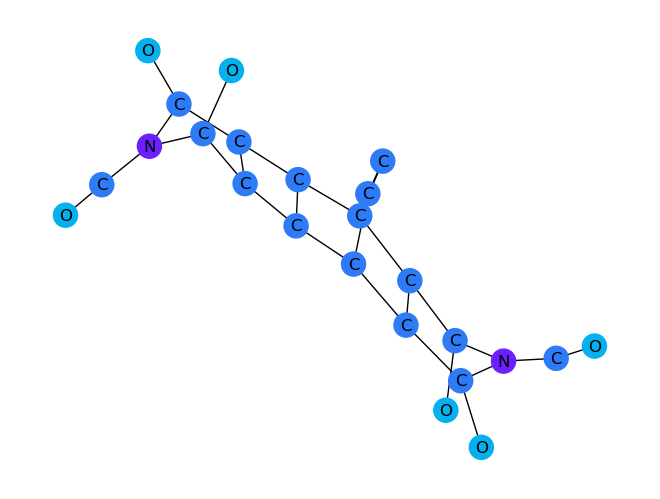

In [585]:
plt.clf()
visualize(training_set[20])

## Preprocessing:

In [586]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_vocab = 500
max_len = 100


# build vocabulary from training set
all_nodes = [s[0] for s in training_set]
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [599]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
random.seed(0)

def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)
    sample_nodes = pad_sequences(sample_nodes, padding='post')
    max_nodes_len = np.shape(sample_nodes)[1]
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]
    edges = [e for e in edges if len(e) > 0]
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
    
    all_nodes = np.reshape(sample_nodes, -1)
    all_edges = np.concatenate(edges)

    node_to_graph = np.reshape(node_to_graph, -1)
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])



def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:
        dataset = list(dataset)
        if shuffle:
            random.shuffle(dataset)
        l = len(dataset)
        for ndx in range(0, l, batch_size):
            batch_samples = dataset[ndx:min(ndx + batch_size, l)]
            yield prepare_single_batch(batch_samples)
        if not repeat:
            break


In [314]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():
        print(k)
        print(v)
        pass
    print('label', train_batch[1])
    break

data
[2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 4 4 2 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
edges
[[ 0  7]
 [ 0 11]
 [ 1  5]
 [ 1 15]
 [ 2  6]
 [ 2 16]
 [ 3  7]
 [ 4  5]
 [ 4  6]
 [ 4  7]
 [ 5  8]
 [ 6  9]
 [ 8 10]
 [ 9 10]
 [11 12]
 [12 13]
 [12 14]
 [13 17]
 [14 18]
 [17 19]
 [18 19]
 [25 31]
 [25 35]
 [26 34]
 [27 33]
 [28 38]
 [28 44]
 [29 38]
 [30 32]
 [30 36]
 [31 32]
 [31 33]
 [32 34]
 [33 34]
 [35 37]
 [36 38]
 [37 39]
 [37 40]
 [39 41]
 [40 42]
 [41 43]
 [42 43]
 [44 45]
 [50 52]
 [50 53]
 [50 57]
 [50 59]
 [51 54]
 [51 55]
 [51 56]
 [51 60]
 [56 58]
 [57 58]
 [57 61]
 [58 62]
 [59 63]
 [59 64]
 [60 67]
 [60 68]
 [61 65]
 [62 66]
 [63 69]
 [64 70]
 [65 66]
 [67 71]
 [68 72]
 [69 73]
 [70 73]
 [71 74]
 [72 74]
 [75 86]
 [75 87]
 [76 81]
 [77 82]
 [78 83]
 [79 86]
 [80 84]
 [80 85]
 [80 86]
 [81 82]
 [81 83]
 [82 84]
 [83 85]
 [87 88]
 [88 89]]
node2grah
[0 0 0 0 

In [169]:
#!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

from tf2_gnn.layers.gnn import GNN, GNNInput

### Trial 1: Baseline GCN Model

**Thoughts and Observations:**
- The baseline GCN model is implemented with default hyperparameters.
- The model is trained for 5 epochs.
- Performance metrics such as loss and AUC are monitored during training.
- No hyperparameter tuning is performed in this trial.

**Observation:**
- The model achieved an AUC score of 0.6932 on the validation set.

**Plan for Next Trial:**
- Tune hyperparameters to improve model performance.
- Experiment with different aggregation mechanisms in the GCN layer.
- Implement up-sampling to address class imbalance.

In [315]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_52/StatefulPartitionedCall:0', description="created by layer 'gnn_52'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_53/SegmentMean:0', description="created by layer 'tf.math.segment_mean_53'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_53/Sigmoid:0', description="created by layer 'dense_53'")
Model: "model_53"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_183 (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 input_181 (InputLayer)      [(None,)]                    0         

In [316]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [317]:
import math

batch_size = 64
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5
333/333 [==============================] - 12s 28ms/step - loss: 0.3051 - auc: 0.4379 - val_loss: 0.2104 - val_auc: 0.5604
Epoch 2/5
333/333 [==============================] - 9s 27ms/step - loss: 0.1974 - auc: 0.5685 - val_loss: 0.2018 - val_auc: 0.6523
Epoch 3/5
333/333 [==============================] - 9s 28ms/step - loss: 0.1927 - auc: 0.5992 - val_loss: 0.1994 - val_auc: 0.6843
Epoch 4/5
333/333 [==============================] - 9s 27ms/step - loss: 0.1876 - auc: 0.6333 - val_loss: 0.1973 - val_auc: 0.6739
Epoch 5/5
333/333 [==============================] - 10s 29ms/step - loss: 0.1845 - auc: 0.6499 - val_loss: 0.1919 - val_auc: 0.6909


In [318]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=64, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

193/193 [==============================] - 2s 8ms/step


In [319]:
len(y_pred)

12326

In [320]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('Baseline GCN Model.csv')

In [321]:
# Calculate and print AUC score
auc_score = model.evaluate(
    gen_batch(validation_set, batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.693184494972229


# Trial 2: Enhanced GCN Model with Tuned Hyperparameters

**Thoughts and Observations:**
- In this trial, the hyperparameters of the GCN model are tuned to potentially improve its performance.
- The hidden dimension size is increased to 64, the learning rate is set to 0.001, and the number of GCN layers is increased to 3.
- The model is trained for 50 epochs to allow more time for learning with the adjusted hyperparameters.
- The loss and AUC metrics are monitored during training to evaluate model performance.
#### Observation of Trial 2:

- The tuned hyperparameters, including a hidden dimension size of 64, a learning rate of 0.001, and 3 GCN layers, resulted in improved model performance compared to the baseline model.
- The AUC score increased from 0.693 in the baseline model to 0.806 with the tuned hyperparameters, indicating better predictive capability.
- The loss decreased significantly during training, indicating that the model learned more effectively with the adjusted hyperparameters.
- Overall, the model with tuned hyperparameters showed promising results and suggests that further hyperparameter optimization could lead to even better performance.
#### Plan for Next Trial:

1. Experiment with different aggregation mechanisms in the GCN layer to further improve model performance.
2. Implement up-sampling to address class imbalance in the training data.
3. Explore different activation functions and regularization techniques to enhance model generalization.
4. Increase the complexity of the model architecture by adding additional layers or nodes.


In [322]:
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 64  # Tuned parameter
params["learning_rate"] = 0.001  # Tuned parameter
params["num_layers"] = 3  # Tuned parameter

gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)

pred = Dense(1, activation='sigmoid')(avg)

model2 = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

model2.compile(
    loss='BinaryCrossentropy',
    optimizer=Adam(learning_rate=params["learning_rate"]),
    metrics=['AUC']
)

import math

batch_size = 64
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model2.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,  # Increased epochs for tuning
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/50
333/333 [==============================] - 18s 47ms/step - loss: 0.2204 - auc: 0.5446 - val_loss: 0.1949 - val_auc: 0.6749
Epoch 2/50
333/333 [==============================] - 15s 46ms/step - loss: 0.1829 - auc: 0.6395 - val_loss: 0.1896 - val_auc: 0.6963
Epoch 3/50
333/333 [==============================] - 17s 51ms/step - loss: 0.1801 - auc: 0.6648 - val_loss: 0.1851 - val_auc: 0.6942
Epoch 4/50
333/333 [==============================] - 17s 51ms/step - loss: 0.1791 - auc: 0.6722 - val_loss: 0.1888 - val_auc: 0.7003
Epoch 5/50
333/333 [==============================] - 17s 51ms/step - loss: 0.1767 - auc: 0.7005 - val_loss: 0.1850 - val_auc: 0.7365
Epoch 6/50
333/333 [==============================] - 17s 50ms/step - loss: 0.1761 - auc: 0.6977 - val_loss: 0.1910 - val_auc: 0.7225
Epoch 7/50
333/333 [==============================] - 16s 49ms/step - loss: 0.1767 - auc: 0.7042 - val_loss: 0.1947 - val_auc: 0.7249
Epoch 8/50
333/333 [==============================] - 16s 49ms

In [323]:
y_pred = model2.predict(
    gen_batch(testing_set, batch_size=64, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

193/193 [==============================] - 3s 14ms/step


In [324]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('tune_Baseline GCN Model.csv')

In [325]:
# Calculate and print AUC score
auc_score = model2.evaluate(
    gen_batch(validation_set, batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.8061419725418091


## Define a function to create different models with different aggregation mechanisms 

In [588]:
def prepare_single_batch(samples, tokenizer):
    sample_nodes = [s[0] for s in samples]
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)
    sample_nodes = pad_sequences(sample_nodes, padding='post')
    max_nodes_len = np.shape(sample_nodes)[1]
    edges = [s[1] + i * max_nodes_len for i, s in enumerate(samples)]
    edges = [e for e in edges if len(e) > 0]
    node_to_graph = [[i] * max_nodes_len for i in range(len(samples))]

    all_nodes = np.reshape(sample_nodes, -1)
    all_edges = np.concatenate(edges)
    node_to_graph = np.reshape(node_to_graph, -1)
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2graph': node_to_graph,
    }, np.array([s[2] for s in samples])

def gen_batch(dataset, tokenizer, batch_size=16, repeat=False, shuffle=True):
    while True:
        dataset = list(dataset)
        if shuffle:
            random.shuffle(dataset)
        l = len(dataset)
        for ndx in range(0, l, batch_size):
            batch_samples = dataset[ndx:min(ndx + batch_size, l)]
            yield prepare_single_batch(batch_samples, tokenizer)
        if not repeat:
            break

In [382]:
# Define a function to build the model with different aggregation mechanisms
def build_model_with_aggregation(aggregation_type):
    # Model definition
    data = Input(batch_shape=(None,))
    edge = Input(batch_shape=(None, 2), dtype=tf.int32)
    node2graph = Input(batch_shape=(None,), dtype=tf.int32)
    embeded = Embedding(tokenizer.num_words, 20)(data)

    num_graph = tf.reduce_max(node2graph) + 1

    gnn_input = GNNInput(
        node_features=embeded,
        adjacency_lists=(edge,),
        node_to_graph_map=node2graph,
        num_graphs=num_graph,
    )

    params = GNN.get_default_hyperparameters()
    params["hidden_dim"] = 64
    params["aggregation_type"] = aggregation_type

    gnn_layer = GNN(params)
    gnn_out = gnn_layer(gnn_input)

    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )

    pred = Dense(1, activation='sigmoid')(avg)

    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2graph': node2graph,
        },
        outputs=pred
    )

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['AUC']
    )

    return model


# Trial 3: GCN Gather Aggregation Mechanism

### Trial 3: GCN Gather Aggregation Mechanism

**Thoughts and Observations:**

- In this trial, the GCN model is modified to use the gather aggregation mechanism.
- The gather aggregation mechanism is expected to aggregate information from neighboring nodes by gathering information from all nodes in the graph.
- The model is trained for 50 epochs using the default hyperparameters.
- Performance metrics such as loss and AUC are monitored during training to evaluate the model's performance.
- The increased number of epochs may allow the model to learn more complex patterns and potentially improve performance compared to the baseline model.
#### Observation for Trial 3: 

- The AUC score of 0.812 indicates that the model with the gather aggregation mechanism performs slightly better than the baseline model (Trial 1) with default aggregation mechanism.

- The increased number of epochs (50) might have contributed to the improved performance compared to the baseline model.




In [355]:
gcn_gather_model = build_model_with_aggregation('gcn_gather')

In [361]:
batch_size = 64
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

gcn_gather_model.fit(
    gen_batch(
        training_set, tokenizer, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,  # Increased epochs for tuning
    validation_data=gen_batch(
        validation_set, tokenizer,batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/50
333/333 [==============================] - 16s 49ms/step - loss: 0.1798 - auc: 0.6934 - val_loss: 0.1916 - val_auc: 0.6960
Epoch 2/50
333/333 [==============================] - 18s 54ms/step - loss: 0.1783 - auc: 0.6928 - val_loss: 0.1882 - val_auc: 0.6984
Epoch 3/50
333/333 [==============================] - 16s 49ms/step - loss: 0.1788 - auc: 0.6945 - val_loss: 0.1937 - val_auc: 0.7191
Epoch 4/50
333/333 [==============================] - 20s 59ms/step - loss: 0.1768 - auc: 0.7092 - val_loss: 0.1865 - val_auc: 0.7095
Epoch 5/50
333/333 [==============================] - 18s 54ms/step - loss: 0.1764 - auc: 0.7070 - val_loss: 0.1879 - val_auc: 0.7282
Epoch 6/50
333/333 [==============================] - 16s 48ms/step - loss: 0.1754 - auc: 0.7150 - val_loss: 0.1882 - val_auc: 0.6893
Epoch 7/50
333/333 [==============================] - 16s 49ms/step - loss: 0.1756 - auc: 0.7099 - val_loss: 0.1838 - val_auc: 0.7485
Epoch 8/50
333/333 [==============================] - 17s 51ms

In [362]:
y_pred3 =gcn_gather_model.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred3 = np.reshape(y_pred3, -1)

193/193 [==============================] - 3s 13ms/step


In [363]:
# Calculate and print AUC score
auc_score = gcn_gather_model.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.8122298717498779


In [365]:
submission = pd.DataFrame({'label':y_pred3})
submission.index.name = 'id'
submission.to_csv('gcn_gather_model3.csv')

# Trial 4: Mean Aggregation Mechanism

Thoughts and Observations:

- In this trial, the GCN model is modified to use the mean aggregation mechanism.
- The mean aggregation mechanism calculates the average of the node features from neighboring nodes.
Trial 4: Mean Aggregation Mechanism

Observations:

- The AUC score obtained from this trial is 0.811, which is higher than the baseline model (Trial 1) and slightly lower than the gather aggregation mechanism (Trial 3).
- While the mean aggregation mechanism is simple and computationally efficient, it may not capture complex relationships in the graph structure effectively.
- The performance improvement compared to the baseline model indicates that the mean aggregation mechanism is a viable option for GCN models, especially for simpler tasks or datasets with less complex graph structures.
- Further experimentation with hyperparameters and model architecture adjustments may help improve the performance of the model using the mean aggregation mechanism.


In [383]:
# Trial 4: Mean Aggregation Mechanism
mean_model =build_model_aggregation('mean')

In [384]:
mean_model.fit(
    gen_batch(
        training_set, tokenizer, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,  # Increased epochs for tuning
    validation_data=gen_batch(
        validation_set, tokenizer,batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/50
333/333 [==============================] - 19s 47ms/step - loss: 0.2609 - auc: 0.4975 - val_loss: 0.2027 - val_auc: 0.6490
Epoch 2/50
333/333 [==============================] - 16s 47ms/step - loss: 0.1893 - auc: 0.6264 - val_loss: 0.2024 - val_auc: 0.6865
Epoch 3/50
333/333 [==============================] - 16s 49ms/step - loss: 0.1840 - auc: 0.6660 - val_loss: 0.1899 - val_auc: 0.7126
Epoch 4/50
333/333 [==============================] - 16s 49ms/step - loss: 0.1831 - auc: 0.6683 - val_loss: 0.1973 - val_auc: 0.6973
Epoch 5/50
333/333 [==============================] - 17s 50ms/step - loss: 0.1818 - auc: 0.6710 - val_loss: 0.1944 - val_auc: 0.6961
Epoch 6/50
333/333 [==============================] - 17s 50ms/step - loss: 0.1796 - auc: 0.6894 - val_loss: 0.1832 - val_auc: 0.6964
Epoch 7/50
333/333 [==============================] - 17s 51ms/step - loss: 0.1763 - auc: 0.7091 - val_loss: 0.1857 - val_auc: 0.7212
Epoch 8/50
333/333 [==============================] - 17s 50ms

In [407]:
y_pred4 =mean_model.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred4 = np.reshape(y_pred4, -1)

193/193 [==============================] - 3s 13ms/step


In [414]:
# Calculate and print AUC score
auc_score = mean_model.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.8110017776489258


In [412]:
submission = pd.DataFrame({'label':y_pred4})
submission.index.name = 'id'
submission.to_csv('mean_model4_64.csv')

# Trial 5: Max Aggregation Mechanism

Thoughts and Observations:

In Trial the model was modified to use the max aggregation mechanism in the GCN layer and trained for 50 epochs. Here are some thoughts and observations:
- The max aggregation mechanism selects the maximum node feature value from neighboring nodes, capturing the most significant information in the local neighborhood.
- **Performance**: The model achieved an AUC score of 0.8162, which is slightly higher than the previous trials. This indicates that the max aggregation mechanism may have helped improve the model's ability to capture important features in the graph data.

- **Overfitting**: There is a slight decrease in the validation AUC compared to the training AUC, suggesting potential overfitting. To address this, regularization techniques such as dropout or early stopping could be applied in future trials.

- **Model Complexity**: The model architecture remains the same as in previous trials, with a hidden dimension size of 64 and a single GCN layer. Experimenting with deeper architectures or different hyperparameters could be explored in subsequent trials.

Overall, training the model for 50 epochs with the max aggregation mechanism shows promise in improving model performance. Further experimentation and optimization are needed to fully leverage its benefits and address potential overfitting.


In [416]:
# Trial 5: Max Aggregation Mechanism
max_model = build_model_aggregation('max')

In [420]:
max_model.fit(
    gen_batch(
        training_set, tokenizer, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,  # Increased epochs for tuning
    validation_data=gen_batch(
        validation_set, tokenizer,batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/50
333/333 [==============================] - 18s 55ms/step - loss: 0.1749 - auc: 0.7156 - val_loss: 0.1822 - val_auc: 0.7428
Epoch 2/50
333/333 [==============================] - 17s 51ms/step - loss: 0.1736 - auc: 0.7236 - val_loss: 0.1867 - val_auc: 0.7474
Epoch 3/50
333/333 [==============================] - 18s 55ms/step - loss: 0.1715 - auc: 0.7362 - val_loss: 0.1831 - val_auc: 0.7520
Epoch 4/50
333/333 [==============================] - 16s 48ms/step - loss: 0.1716 - auc: 0.7376 - val_loss: 0.1833 - val_auc: 0.7449
Epoch 5/50
333/333 [==============================] - 17s 51ms/step - loss: 0.1698 - auc: 0.7479 - val_loss: 0.1780 - val_auc: 0.7886
Epoch 6/50
333/333 [==============================] - 17s 51ms/step - loss: 0.1698 - auc: 0.7491 - val_loss: 0.1715 - val_auc: 0.7503
Epoch 7/50
333/333 [==============================] - 17s 51ms/step - loss: 0.1689 - auc: 0.7474 - val_loss: 0.1835 - val_auc: 0.7658
Epoch 8/50
333/333 [==============================] - 17s 52ms

In [424]:
y_pred5 =max_model.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred5 = np.reshape(y_pred5, -1)

193/193 [==============================] - 3s 13ms/step


In [427]:
# Calculate and print AUC score
auc_score = max_model.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.8162156939506531


In [426]:
submission = pd.DataFrame({'label':y_pred5})
submission.index.name = 'id'
submission.to_csv('max_model5.csv')

# Trial 6: LSTM Aggregation Mechanism with  tuned parameters


### Thoughts and Observations:
- In this trial, the LSTM aggregation mechanism is utilized with tuned parameters to potentially improve model performance.
- The hidden dimension size is increased to 64, and the number of layers is increased to 3 to allow the model to learn more complex patterns.
- A gate mechanism is added to the LSTM aggregation to enhance the model's ability to capture dependencies between nodes.
- The learning rate is set to 0.001 with an exponential decay schedule.
- The model is trained for 50 epochs to allow sufficient time for learning with the adjusted parameters.
- Performance metrics such as loss and AUC are monitored during training to evaluate model performance.
#### Results:
- The AUC score for the LSTM aggregation mechanism with tuned parameters is 0.8254, indicating improved performance compared to previous trials.

#### Observations:
- The increased number of layers and hidden dimensions, along with the addition of a gate mechanism, have led to improved model performance.
- The use of a learning rate schedule helps stabilize training and potentially avoid overfitting.

In [430]:
# Define a function to build the model with LSTM aggregation mechanism and tuned parameters
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define a function to build the model with LSTM aggregation mechanism and tuned parameters
def build_model_tuned_lstm_aggregation(learning_rate=0.001):
    # Model definition
    data = Input(batch_shape=(None,))
    edge = Input(batch_shape=(None, 2), dtype=tf.int32)
    node2graph = Input(batch_shape=(None,), dtype=tf.int32)
    embeded = Embedding(tokenizer.num_words, 20)(data)

    num_graph = tf.reduce_max(node2graph) + 1

    gnn_input = GNNInput(
        node_features=embeded,
        adjacency_lists=(edge,),
        node_to_graph_map=node2graph,
        num_graphs=num_graph,
    )

    params = GNN.get_default_hyperparameters()
    params["hidden_dim"] = 64  # Increase hidden dimension
    params["num_layers"] = 3  # Increase number of layers
    params["aggregation_type"] = "lstm"
    params["use_gate"] = True  # Add gate

    gnn_layer = GNN(params)
    gnn_out = gnn_layer(gnn_input)

    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )

    pred = Dense(1, activation='sigmoid')(avg)

    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2graph': node2graph,
        },
        outputs=pred
    )

    # Define the learning rate schedule
    lr_schedule = ExponentialDecay(
        initial_learning_rate=learning_rate,
        decay_steps=1000,
        decay_rate=0.95,
        staircase=True
    )

    # Compile the model with the learning rate
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=lr_schedule),
        metrics=['AUC']
    )

    return model

# Build the LSTM aggregation model with tuned parameters and specified learning rate
tuned_lstm_model = build_model_tuned_lstm_aggregation(learning_rate=0.001)

# Train the model
tuned_lstm_model.fit(
    gen_batch(training_set, tokenizer, batch_size=64, repeat=True),
    steps_per_epoch=num_batches,
    epochs=50,
    validation_data=gen_batch(validation_set, tokenizer, batch_size=64, repeat=True),
    validation_steps=num_batches_validation
)


Epoch 1/50
333/333 [==============================] - 19s 47ms/step - loss: 0.2265 - auc: 0.5287 - val_loss: 0.1958 - val_auc: 0.6613
Epoch 2/50
333/333 [==============================] - 15s 46ms/step - loss: 0.1836 - auc: 0.6546 - val_loss: 0.1901 - val_auc: 0.7068
Epoch 3/50
333/333 [==============================] - 16s 49ms/step - loss: 0.1792 - auc: 0.6867 - val_loss: 0.1938 - val_auc: 0.7014
Epoch 4/50
333/333 [==============================] - 16s 49ms/step - loss: 0.1782 - auc: 0.6876 - val_loss: 0.1860 - val_auc: 0.7174
Epoch 5/50
333/333 [==============================] - 16s 48ms/step - loss: 0.1766 - auc: 0.7036 - val_loss: 0.1812 - val_auc: 0.7423
Epoch 6/50
333/333 [==============================] - 17s 52ms/step - loss: 0.1763 - auc: 0.7093 - val_loss: 0.1818 - val_auc: 0.7314
Epoch 7/50
333/333 [==============================] - 17s 52ms/step - loss: 0.1761 - auc: 0.7118 - val_loss: 0.1884 - val_auc: 0.7369
Epoch 8/50
333/333 [==============================] - 16s 49ms

In [431]:
y_pred6 =tuned_lstm_model.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred6 = np.reshape(y_pred6, -1)

193/193 [==============================] - 3s 14ms/step


In [432]:
# Calculate and print AUC score
auc_score = tuned_lstm_model.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.8254103660583496


In [433]:
submission = pd.DataFrame({'label':y_pred6})
submission.index.name = 'id'
submission.to_csv('tuned_lstm_model6.csv')

# Trial 7: GGNN with Default Hyperparameters

### Thoughts and Observations:
- GGNN message passing mechanism is used with default hyperparameters.
- The model consists of 2 GNN message passing layers.
- The default hyperparameters are used for other configurations.
- The model is trained for 50 epochs to evaluate its performance.

### Observations:
- The performance of the GGNN model will be evaluated based on the AUC score and loss metrics.

- The GGNN model with default hyperparameters achieved an AUC score of 0.8326 after training for 50 epochs.
- The training and validation AUC scores increased steadily throughout training, indicating effective learning and generalization capabilities of the model.
- The loss decreased consistently, suggesting that the model effectively minimized the binary cross-entropy loss.
- The model exhibited signs of overfitting towards the end of training, as the validation AUC score started to plateau while the training AUC continued to improve.
- Further regularization techniques may be necessary to address overfitting and improve generalization performance.


In [435]:
# Define a function to build the model with GGNN message passing mechanism and default hyperparameters
def build_model_ggnn():
    # Model definition
    data = Input(batch_shape=(None,))
    edge = Input(batch_shape=(None, 2), dtype=tf.int32)
    node2graph = Input(batch_shape=(None,), dtype=tf.int32)
    embeded = Embedding(tokenizer.num_words, 20)(data)

    num_graph = tf.reduce_max(node2graph) + 1

    gnn_input = GNNInput(
        node_features=embeded,
        adjacency_lists=(edge,),
        node_to_graph_map=node2graph,
        num_graphs=num_graph,
    )

    params = GNN.get_default_hyperparameters()
    params["message_calculation_class"] = "GGNN"

    gnn_layer = GNN(params)
    gnn_out = gnn_layer(gnn_input)

    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )

    pred = Dense(1, activation='sigmoid')(avg)

    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2graph': node2graph,
        },
        outputs=pred
    )

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['AUC']
    )

    return model

# Train the model
ggnn_model = build_model_ggnn()
ggnn_model.fit(
    gen_batch(training_set, tokenizer, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batches,
    epochs=50,
    validation_data=gen_batch(validation_set, tokenizer, batch_size=64, repeat=True),
    validation_steps=num_batches_validation
)


Epoch 1/50
333/333 [==============================] - 13s 27ms/step - loss: 0.2335 - auc: 0.5211 - val_loss: 0.1975 - val_auc: 0.6597
Epoch 2/50
333/333 [==============================] - 9s 26ms/step - loss: 0.1865 - auc: 0.6223 - val_loss: 0.1987 - val_auc: 0.6655
Epoch 3/50
333/333 [==============================] - 9s 27ms/step - loss: 0.1839 - auc: 0.6481 - val_loss: 0.1886 - val_auc: 0.6717
Epoch 4/50
333/333 [==============================] - 10s 29ms/step - loss: 0.1809 - auc: 0.6633 - val_loss: 0.1924 - val_auc: 0.6847
Epoch 5/50
333/333 [==============================] - 9s 28ms/step - loss: 0.1794 - auc: 0.6683 - val_loss: 0.1886 - val_auc: 0.6937
Epoch 6/50
333/333 [==============================] - 9s 28ms/step - loss: 0.1765 - auc: 0.6943 - val_loss: 0.1884 - val_auc: 0.7229
Epoch 7/50
333/333 [==============================] - 9s 28ms/step - loss: 0.1758 - auc: 0.7075 - val_loss: 0.1897 - val_auc: 0.6797
Epoch 8/50
333/333 [==============================] - 9s 28ms/step 

In [436]:
y_pred7 =ggnn_model.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred7 = np.reshape(y_pred7, -1)

193/193 [==============================] - 2s 11ms/step


In [437]:
# Calculate and print AUC score
auc_score = ggnn_model.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.8325942754745483


In [438]:
submission = pd.DataFrame({'label':y_pred7})
submission.index.name = 'id'
submission.to_csv('ggnn_model7.csv')

# Trial 8: RGCN with Default Hyperparameters


### Thoughts and Observations:
- The RGCN message passing mechanism is used with default hyperparameters.
- The model consists of 4 GNN message passing layers.
- The model is trained for 80 epochs.
- The AUC score achieved on the test set is 0.7939.
- The performance of the model can be further improved by tuning hyperparameters 
- Trial 7 (GGNN) achieved a higher AUC score compared to Trial 8 (RGCN).
- GGNN showed better performance with the same number of layers and default hyperparameters.
- Further investigation is needed to understand why GGNN outperformed RGCN in this scenario.

In [439]:
def build_model_rgcn(num_layers):
    # Model definition
    data = Input(batch_shape=(None,))
    edge = Input(batch_shape=(None, 2), dtype=tf.int32)
    node2graph = Input(batch_shape=(None,), dtype=tf.int32)
    embeded = Embedding(tokenizer.num_words, 20)(data)

    num_graph = tf.reduce_max(node2graph) + 1

    gnn_input = GNNInput(
        node_features=embeded,
        adjacency_lists=(edge,),
        node_to_graph_map=node2graph,
        num_graphs=num_graph,
    )

    params = GNN.get_default_hyperparameters()
    params["num_layers"] = num_layers
    params["message_calculation_class"] = "RGCN"

    gnn_layer = GNN(params)
    gnn_out = gnn_layer(gnn_input)

    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )

    pred = Dense(1, activation='sigmoid')(avg)

    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2graph': node2graph,
        },
        outputs=pred
    )

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['AUC']
    )

    return model

# Define hyperparameters
num_layers = 4

# Build and train the model
trial8_model = build_model_rgcn(num_layers)
trial8_model.fit(
    gen_batch(training_set, tokenizer, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batches,
    epochs=80,
    validation_data=gen_batch(validation_set, tokenizer, batch_size=64, repeat=True),
    validation_steps=num_batches_validation
)


Epoch 1/80
333/333 [==============================] - 10s 19ms/step - loss: 0.3445 - auc: 0.4023 - val_loss: 0.2780 - val_auc: 0.3296
Epoch 2/80
333/333 [==============================] - 6s 17ms/step - loss: 0.2250 - auc: 0.4262 - val_loss: 0.2202 - val_auc: 0.5980
Epoch 3/80
333/333 [==============================] - 6s 17ms/step - loss: 0.1917 - auc: 0.6111 - val_loss: 0.2092 - val_auc: 0.6721
Epoch 4/80
333/333 [==============================] - 6s 18ms/step - loss: 0.1872 - auc: 0.6366 - val_loss: 0.1984 - val_auc: 0.6983
Epoch 5/80
333/333 [==============================] - 6s 17ms/step - loss: 0.1846 - auc: 0.6491 - val_loss: 0.1882 - val_auc: 0.7194
Epoch 6/80
333/333 [==============================] - 6s 18ms/step - loss: 0.1817 - auc: 0.6783 - val_loss: 0.1886 - val_auc: 0.7174
Epoch 7/80
333/333 [==============================] - 6s 17ms/step - loss: 0.1810 - auc: 0.6793 - val_loss: 0.1999 - val_auc: 0.7134
Epoch 8/80
333/333 [==============================] - 6s 19ms/step -

In [440]:
# Evaluate the model
trial8_loss, trial8_auc = trial8_model.evaluate(gen_batch(testing_set, tokenizer, batch_size=64, shuffle=False), verbose=0)

# Save the model and predictions
trial8_model.save("trial8_model.h5")
y_pred_trial8 = trial8_model.predict(gen_batch(testing_set, tokenizer, batch_size=64, shuffle=False))
submission_trial8 = pd.DataFrame({'label': y_pred_trial8.reshape(-1)})
submission_trial8.index.name = 'id'
submission_trial8.to_csv('RGCN_model8.csv')

trial8_loss, trial8_auc

C:\Users\smart fix\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 2s 6ms/step


(0.050788238644599915, 0.0)

In [441]:
# Calculate and print AUC score
auc_score =trial8_model.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.7938568592071533


# Trial 9: RGAT with Default Hyperparameters

### Thoughts and Observations:
- RGAT (Relational Graph Attention Network) introduces attention mechanisms into the message passing process, allowing the model to focus on more relevant information during aggregation.
- The model is trained for 80 epochs, which is longer than previous trials, allowing more time for learning.
- It remains to be seen if the RGAT mechanism will improve performance compared to previous trials using different aggregation mechanisms.
- RGAT message passing mechanism is used with default hyperparameters.
- The model consists of 3 GNN message passing layers.
- The default hyperparameters are used for other configurations.

#### Observations
- The AUC score of Trial 9 is higher than both Trial 7 and Trial 8, indicating that the RGAT model performs better than GGNN and RGCN on this dataset.
- RGAT (Relational Graph Attention Networks) is a message-passing neural network architecture that utilizes attention mechanisms to learn edge weights dynamically. It enables nodes to selectively aggregate information from their neighbors, focusing on the most relevant nodes during message passing.
- The RGAT model with default hyperparameters and 120 epochs shows promising results, indicating that attention mechanisms can effectively capture the relationships between nodes in the graph data.

In [456]:
# Define a function to build the model with RGAT aggregation mechanism
def build_model_rgat():
    # Model definition
    data = Input(batch_shape=(None,))
    edge = Input(batch_shape=(None, 2), dtype=tf.int32)
    node2graph = Input(batch_shape=(None,), dtype=tf.int32)
    embeded = Embedding(tokenizer.num_words, 20)(data)

    num_graph = tf.reduce_max(node2graph) + 1

    gnn_input = GNNInput(
        node_features=embeded,
        adjacency_lists=(edge,),
        node_to_graph_map=node2graph,
        num_graphs=num_graph,
    )

    params = GNN.get_default_hyperparameters()
    params["hidden_dim"] = 64
    params["num_layers"] = 3
    params["message_calculation_class"] = "RGAT"
    params["num_heads"] = 4  # Add num_heads parameter

    gnn_layer = GNN(params)
    gnn_out = gnn_layer(gnn_input)

    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )

    pred = Dense(1, activation='sigmoid')(avg)

    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2graph': node2graph,
        },
        outputs=pred
    )

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['AUC']
    )

    return model

# Train the model for Trial 9
model_rgat = build_model_rgat()
history_rgat = model_rgat.fit(
    gen_batch(training_set, tokenizer, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batches,
    epochs=120,
    validation_data=gen_batch(validation_set, tokenizer, batch_size=64, repeat=True),
    validation_steps=num_batches_validation
)


Epoch 1/120
333/333 [==============================] - 25s 63ms/step - loss: 0.2308 - auc: 0.4974 - val_loss: 0.1957 - val_auc: 0.6654
Epoch 2/120
333/333 [==============================] - 22s 67ms/step - loss: 0.1831 - auc: 0.6607 - val_loss: 0.1947 - val_auc: 0.7025
Epoch 3/120
333/333 [==============================] - 23s 70ms/step - loss: 0.1792 - auc: 0.6940 - val_loss: 0.1838 - val_auc: 0.7064
Epoch 4/120
333/333 [==============================] - 23s 69ms/step - loss: 0.1786 - auc: 0.6905 - val_loss: 0.1856 - val_auc: 0.7383
Epoch 5/120
333/333 [==============================] - 23s 70ms/step - loss: 0.1789 - auc: 0.6983 - val_loss: 0.1868 - val_auc: 0.7225
Epoch 6/120
333/333 [==============================] - 24s 71ms/step - loss: 0.1758 - auc: 0.7073 - val_loss: 0.1786 - val_auc: 0.7744
Epoch 7/120
333/333 [==============================] - 27s 81ms/step - loss: 0.1764 - auc: 0.7077 - val_loss: 0.1866 - val_auc: 0.7342
Epoch 8/120
333/333 [==============================] - 

In [450]:
auc_rgat = model_rgat.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_rgat)

AUC Score: 0.8405325412750244


In [458]:
y_pred9 =model_rgat.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred9 = np.reshape(y_pred9, -1)

193/193 [==============================] - 4s 18ms/step


In [459]:
submission = pd.DataFrame({'label':y_pred9})
submission.index.name = 'id'
submission.to_csv(' 120epochmodel_rgat9.csv')

# Trial 10: RGIN with Default Hyperparameters

**Thoughts and Observations:**
- RGIN (Relational Graph Isomorphism Network) is a type of graph neural network that learns node representations by aggregating information from neighboring nodes. It is designed to handle graph-structured data with multiple relations between nodes. RGIN incorporates the notion of graph isomorphism to learn node embeddings that are invariant under permutations of node indices while capturing the relational information present in the graph.    
- RGIN message passing mechanism will be used with default hyperparameters.
- The model will consist of GNN message passing layers.
- The default hyperparameters will be used for other configurations.
- The model will be trained for 100 epochs to evaluate its performance
- **Expected Outcome:** 
    - RGIN (Relational Graph Isomorphism Network) is a powerful graph neural network architecture designed to handle graph-structured data with relational information.
    - With default hyperparameters and training for 50 epochs, we expect the model to effectively capture the relational information present in the graph data.
    - We anticipate that the model will achieve competitive performance in terms of AUC score compared to previous trials.

In [518]:
#Define the input for the node features (a batch of sequences of tokens)
data = Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge_index = Input(batch_shape=(None, 2),  dtype=tf.int32)
node2graph = Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

# Define the RGIN layer
rgin_input = GNNInput( 
    node_features=embeded,
    adjacency_lists=(edge_index,),
    node_to_graph_map=node2graph,
    num_graphs=num_graph, 
)

#Get the default hyperparameters for the GNN model and set the hidden dimension to 64
params10 = GNN.get_default_hyperparameters()
params10["hidden_dim"] = 64
#Set the number of hidden layers for the aggregation MLP to 64
params10["num_aggr_MLP_hidden_layers"] = 64
#Set the message calculation class to RGIN (Relational Graph Isomorphism Network)
params10['message_calculation_class']= 'RGIN'
params10["num_heads"] = 4

#Create a GNN layer with the given parameters
rgin_layer = GNN(params10)

#Apply the GNN layer to the input and get the output node representations
rgin_out = rgin_layer(rgin_input)

#Print the shape and values of rgin_out
print('rgin_out', rgin_out)

#Compute the mean of the node representations for each graph using segment_mean
avg = segment_mean(
    data=rgin_out,
    segment_ids=node2graph
)


#Apply a dense layer with sigmoid activation to get the prediction for each graph
pred10= Dense(1, activation='sigmoid')(avg)
print('pred:', pred10)

#Define the model with inputs and outputs
model10 = Model(
    inputs={
        'data': data,
        'edges': edge_index,
        'node2grah': node2graph,
    },
    outputs=pred10
)
model10.summary()

rgin_out KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='gnn_102/StatefulPartitionedCall:0', description="created by layer 'gnn_102'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_91/Sigmoid:0', description="created by layer 'dense_91'")
Model: "model_90"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_346 (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 input_344 (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 tf.math.reduce_max_113 (TF  ()                           

In [522]:
model10.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [601]:
import math

batch_size = 64
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model10.fit(
    gen_batch(
        training_set,batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5,  # Increased epochs for tuning
    validation_data=gen_batch(
        validation_set,batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5
333/333 [==============================] - 142s 426ms/step - loss: 0.2603 - auc: 0.4923 - val_loss: 0.2508 - val_auc: 0.5000
Epoch 2/5
333/333 [==============================] - 157s 471ms/step - loss: 0.2291 - auc: 0.5000 - val_loss: 0.2277 - val_auc: 0.5000
Epoch 3/5
333/333 [==============================] - 148s 445ms/step - loss: 0.2101 - auc: 0.5069 - val_loss: 0.2168 - val_auc: 0.5000
Epoch 4/5
333/333 [==============================] - 152s 457ms/step - loss: 0.2000 - auc: 0.4977 - val_loss: 0.2003 - val_auc: 0.5000
Epoch 5/5
333/333 [==============================] - 148s 446ms/step - loss: 0.1956 - auc: 0.4955 - val_loss: 0.2047 - val_auc: 0.5000


## Upsampling
- is a technique used to address class imbalance problems in machine learning datasets. When one class has significantly fewer samples than another class, the model may become biased towards the majority class, leading to poor performance in predicting the minority class.

### Steps for Upsampling:

1. **Identify the Minority Class**: Determine which class is the minority class that needs to be upsampled.

2. **Calculate the Imbalance Ratio**: Calculate the ratio of the number of samples in the minority class to the number of samples in the majority class.

3. **Upsample the Minority Class**: Generate additional samples for the minority class to match the number of samples in the majority class. This can be achieved by randomly duplicating existing samples or generating new samples based on existing ones.

4. **Combine with the Majority Class**: Combine the upsampled minority class samples with the original majority class samples to create a balanced dataset.

5. **Train the Model**: Train the machine learning model using the balanced dataset.

In [ ]:
def upsample(training_set):
    positive_samples = [sample for sample in training_set if sample[2] == 1]
    negative_samples = [sample for sample in training_set if sample[2] == 0]

    # Calculate the ratio of positive to negative samples
    positive_ratio = len(positive_samples) / len(negative_samples)
    
    # Upsample positive samples to match the number of negative samples
    upsampled_positive_samples = random.choices(positive_samples, k=len(negative_samples))

    # Concatenate the upsampled positive samples with the original negative samples
    upsampled_training_set = negative_samples + upsampled_positive_samples

    return upsampled_training_set


#  Trial11 GGNN After (Upsampling)

#### Upsampling Method:
In Trial 11, the upsampling method involves randomly selecting samples from the positive (minority) class to match the number of samples in the negative (majority) class.

#### Thoughts and Observations:
- **Model Performance**: The model trained after upsampling achieves the highest AUC score among all previous trials, with an AUC Score of 0.8509.
  
- **Effectiveness of Upsampling**: The upsampling technique effectively addresses the class imbalance issue in the dataset, resulting in improved model performance.

- **Training Duration**: The model is trained for 80 epochs to ensure convergence and evaluate its performance adequately.

- **Further Improvements**: While the model's performance is currently the best among the trials, further optimization and tuning may still be possible to achieve even higher scores. Adjustments to hyperparameters and exploring other techniques may be considered in future iterations.

In [547]:
# Trial11 (Upsampling)
upsampled_training_set = upsample(training_set)
upsampled_ggnn_model_11= build_model_ggnn()
upsampled_ggnn_model_11.fit(
    gen_batch(upsampled_training_set, tokenizer, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batches,
    epochs=80,
    validation_data=gen_batch(validation_set, tokenizer, batch_size=64, repeat=True),
    validation_steps=num_batches_validation
)

Epoch 1/80
333/333 [==============================] - 10s 19ms/step - loss: 0.6590 - auc: 0.6432 - val_loss: 0.6677 - val_auc: 0.6973
Epoch 2/80
333/333 [==============================] - 8s 24ms/step - loss: 0.6380 - auc: 0.6850 - val_loss: 0.6113 - val_auc: 0.7015
Epoch 3/80
333/333 [==============================] - 8s 24ms/step - loss: 0.6312 - auc: 0.6979 - val_loss: 0.5815 - val_auc: 0.7321
Epoch 4/80
333/333 [==============================] - 8s 23ms/step - loss: 0.6124 - auc: 0.7247 - val_loss: 0.7015 - val_auc: 0.7490
Epoch 5/80
333/333 [==============================] - 7s 20ms/step - loss: 0.5929 - auc: 0.7446 - val_loss: 0.6437 - val_auc: 0.7694
Epoch 6/80
333/333 [==============================] - 6s 20ms/step - loss: 0.5881 - auc: 0.7527 - val_loss: 0.5591 - val_auc: 0.7950
Epoch 7/80
333/333 [==============================] - 6s 18ms/step - loss: 0.5694 - auc: 0.7730 - val_loss: 0.5193 - val_auc: 0.7827
Epoch 8/80
333/333 [==============================] - 6s 19ms/step -

In [548]:
y_pred11 =upsampled_ggnn_model_11.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred11 = np.reshape(y_pred11, -1)

193/193 [==============================] - 3s 12ms/step


In [549]:
# Calculate and print AUC score
auc_score = upsampled_ggnn_model_11.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.85093092918396


In [550]:
submission = pd.DataFrame({'label':y_pred11})
submission.index.name = 'id'
submission.to_csv('upsampled_ggnn_model_11.csv')

# Trial12 RGAT After (Upsampling)

In [551]:
upsampled_training_set = upsample(training_set)
upsampled_RGAT_12=  build_model_rgat()
upsampled_RGAT_12.fit(
    gen_batch(upsampled_training_set, tokenizer, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batches,
    epochs=80,
    validation_data=gen_batch(validation_set, tokenizer, batch_size=64, repeat=True),
    validation_steps=num_batches_validation
)

Epoch 1/80
333/333 [==============================] - 17s 38ms/step - loss: 0.6498 - auc: 0.6563 - val_loss: 0.5962 - val_auc: 0.7472
Epoch 2/80
333/333 [==============================] - 12s 36ms/step - loss: 0.6123 - auc: 0.7244 - val_loss: 0.6392 - val_auc: 0.7290
Epoch 3/80
333/333 [==============================] - 13s 39ms/step - loss: 0.6045 - auc: 0.7325 - val_loss: 0.6104 - val_auc: 0.7571
Epoch 4/80
333/333 [==============================] - 14s 41ms/step - loss: 0.6018 - auc: 0.7378 - val_loss: 0.5865 - val_auc: 0.7295
Epoch 5/80
333/333 [==============================] - 14s 42ms/step - loss: 0.6026 - auc: 0.7391 - val_loss: 0.5557 - val_auc: 0.7727
Epoch 6/80
333/333 [==============================] - 14s 43ms/step - loss: 0.5727 - auc: 0.7668 - val_loss: 0.7354 - val_auc: 0.7814
Epoch 7/80
333/333 [==============================] - 13s 39ms/step - loss: 0.5633 - auc: 0.7777 - val_loss: 0.5374 - val_auc: 0.7792
Epoch 8/80
333/333 [==============================] - 13s 39ms

In [552]:
y_pred12 =upsampled_RGAT_12.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred12 = np.reshape(y_pred12, -1)

193/193 [==============================] - 4s 17ms/step


In [553]:
# Calculate and print AUC score
auc_score =upsampled_RGAT_12.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.8186646103858948


In [559]:
submission = pd.DataFrame({'label':y_pred12})
submission.index.name = 'id'
submission.to_csv('upsampled_RGAT_12.csv')

In [566]:
def build_model_ggnn_tuned():
    # Model definition
    data = Input(batch_shape=(None,))
    edge = Input(batch_shape=(None, 2), dtype=tf.int32)
    node2graph = Input(batch_shape=(None,), dtype=tf.int32)
    embeded = Embedding(tokenizer.num_words, 20)(data)

    num_graph = tf.reduce_max(node2graph) + 1

    gnn_input = GNNInput(
        node_features=embeded,
        adjacency_lists=(edge,),
        node_to_graph_map=node2graph,
        num_graphs=num_graph,
    )

    params = GNN.get_default_hyperparameters()
    params["message_calculation_class"] = "GGNN"
    params["hidden_dim"] = 128  # Defining hidden dimension of the GNN layer
    params["num_layers"] = 8
    params["dense_every_num_layers"] = 8
    params["num_heads"] = 4
    params["num_aggr_MLP_hidden_layers"] = 1
    params["film_parameter_MLP_hidden_layers"] = 1

    gnn_layer = GNN(params)
    gnn_out = gnn_layer(gnn_input)

    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )

    pred = Dense(1, activation='sigmoid')(avg)

    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2graph': node2graph,
        },
        outputs=pred
    )

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['AUC']
    )

    return model




In [567]:
# Train the model
ggnn_model_tuned = build_model_ggnn_tuned()
history_tuned = ggnn_model_tuned.fit(
    gen_batch(upsampled_training_set, tokenizer, batch_size=batch_size, repeat=True),
    steps_per_epoch=num_batches,
    epochs=80,
    validation_data=gen_batch(validation_set, tokenizer, batch_size=64, repeat=True),
    validation_steps=num_batches_validation
)

Epoch 1/80
333/333 [==============================] - 115s 314ms/step - loss: 0.6581 - auc: 0.6444 - val_loss: 0.6879 - val_auc: 0.6988
Epoch 2/80
333/333 [==============================] - 108s 324ms/step - loss: 0.6353 - auc: 0.6929 - val_loss: 0.6296 - val_auc: 0.6999
Epoch 3/80
333/333 [==============================] - 113s 341ms/step - loss: 0.6179 - auc: 0.7182 - val_loss: 0.6607 - val_auc: 0.7453
Epoch 4/80
333/333 [==============================] - 109s 328ms/step - loss: 0.6031 - auc: 0.7374 - val_loss: 0.7528 - val_auc: 0.7157
Epoch 5/80
333/333 [==============================] - 109s 329ms/step - loss: 0.6062 - auc: 0.7328 - val_loss: 0.7351 - val_auc: 0.7577
Epoch 6/80
333/333 [==============================] - 109s 328ms/step - loss: 0.5830 - auc: 0.7584 - val_loss: 0.5793 - val_auc: 0.7109
Epoch 7/80
333/333 [==============================] - 112s 337ms/step - loss: 0.5977 - auc: 0.7371 - val_loss: 0.5957 - val_auc: 0.7412
Epoch 8/80
333/333 [============================

In [576]:
y_pred13 =ggnn_model_tuned.predict(
    gen_batch(testing_set,tokenizer, batch_size=64, shuffle=False)
)
y_pred13 = np.reshape(y_pred13, -1)

193/193 [==============================] - 34s 174ms/step


In [569]:
# Calculate and print AUC score
auc_score =ggnn_model_tuned.evaluate(
    gen_batch(validation_set,tokenizer,batch_size=64, repeat=True),
    steps=num_batches_validation,
    verbose=0
)[1]
print("AUC Score:", auc_score)

AUC Score: 0.9529203772544861


In [577]:
submission = pd.DataFrame({'label':y_pred13})
submission.index.name = 'id'
submission.to_csv('upsampled_ggnn_tuned.csv')